In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# Data
data16ues = {
    'Process': ['RF Env. Man. Connection', 'E2Node Connection', 'xApp Monitoring', 'Prometheus', 'Vespa Manager', 'Ves Collector', 'Kafka', 'rApp Energy Savings', 'xApp Handover', 'E2Node Handover', 'RF Env. Man. Handover'],
    'Mean': [0.0003, 0.0003, 0.000155, 1.83, 4.332, 1.324148, 0.722, 1.12632, 0.01734537782, 0.018, 0.05],
    'Std Dev': [0.00001, 0.00001, 0.0001674315781, 0.2, 0.3, 0.05, 0.1, 0.39, 0.00026, 0.002, 0.005]
}

data1024ues = {
    'Process': [
        'RF Env. Man. Connection', 'E2Node Connection', 'xApp Monitoring', 
        'Prometheus', 'Vespa Manager', 'Ves Collector', 'Kafka', 
        'rApp Energy Savings', 'xApp Handover', 'E2Node Handover', 
        'RF Env. Man. Handover'
    ],
    'Mean': [
        0.03528625192, 0.03528625192, 0.01823123016, 
        215.2461367, 672, 155.7473997, 84.92224628, 
        310.2925, 2.040177904, 2.117175115, 5.881041986
    ],
    'Std Dev': [
        0.001176208397, 0.001176208397, 0.01969344281, 
        23.52416795, 46.53739612, 5.881041986, 11.76208397, 
        73.01, 0.093, 0.2352416795, 0.5881041986
    ]
}

# DataFrame
df16 = pd.DataFrame(data16ues)
df1024 = pd.DataFrame(data1024ues)

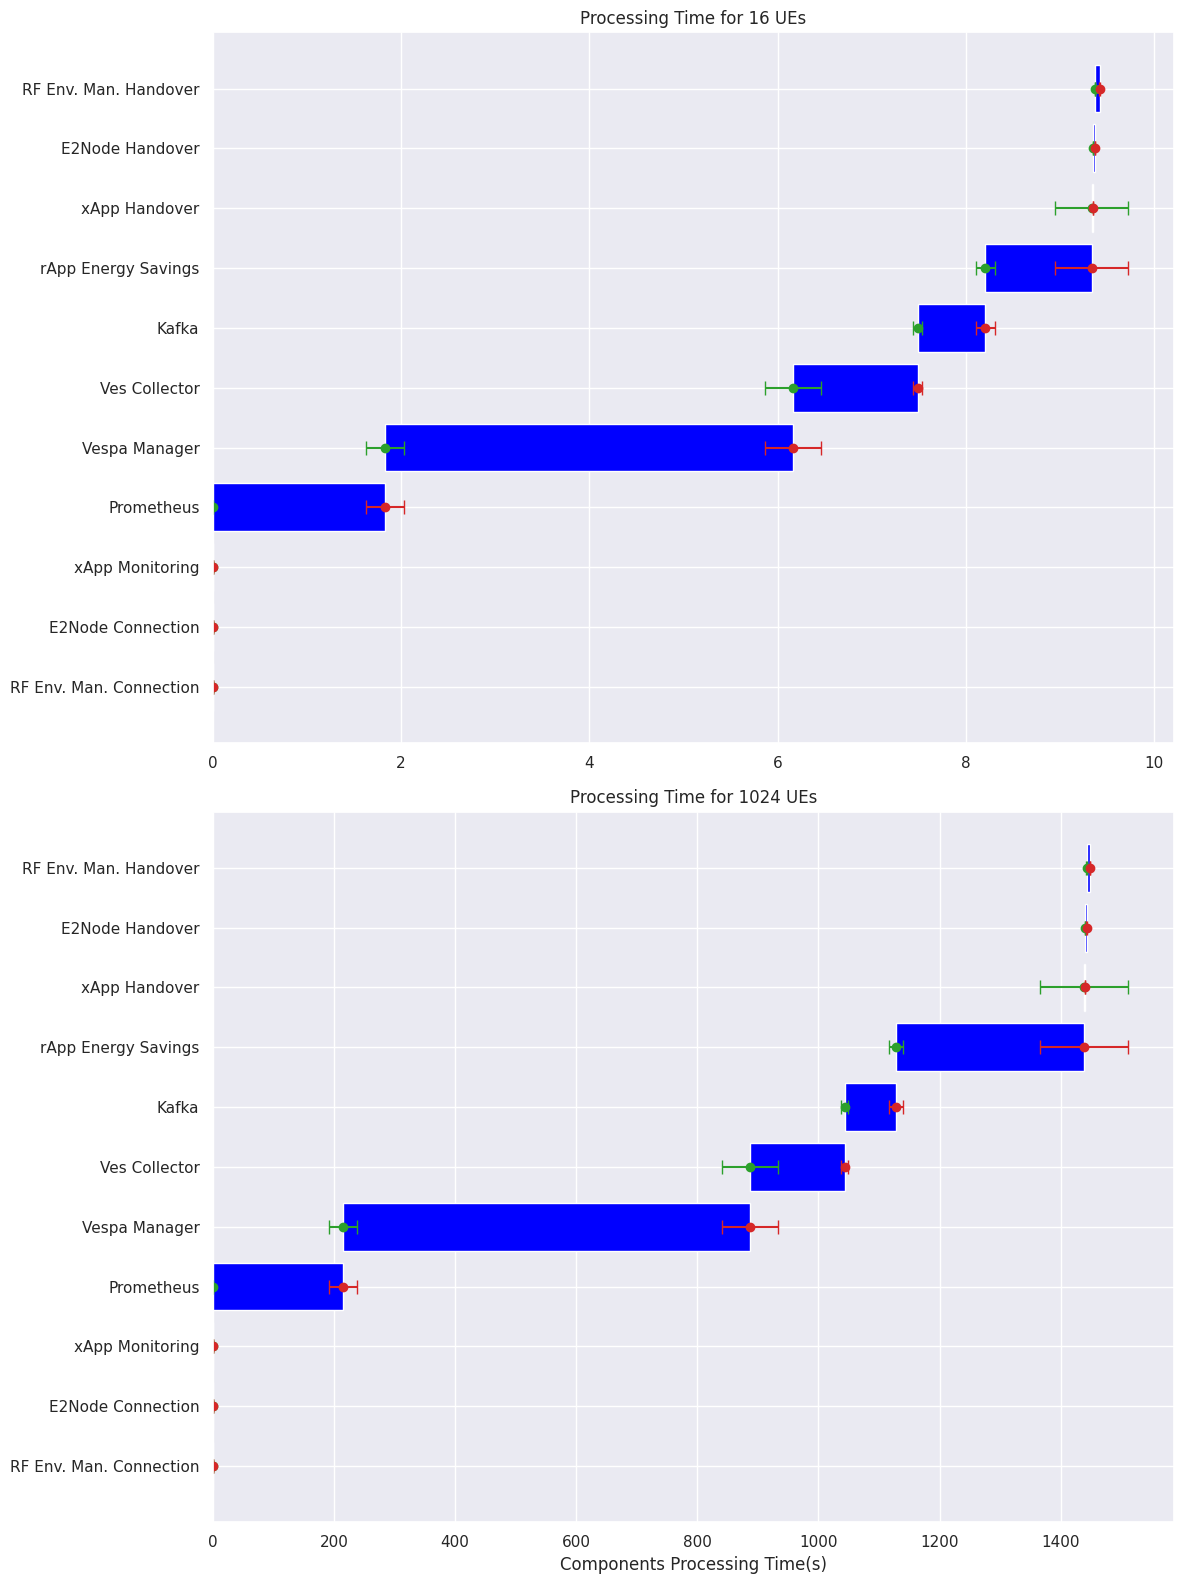

In [3]:
# Set seaborn style
sns.set(style="darkgrid")

# Adjust data to reflect the process finish and next start for 16 UEs
df16['End'] = df16['Mean'].cumsum()
df16['Start'] = df16['End'].shift(1, fill_value=0)
df16['Prev Std Dev'] = df16['Std Dev'].shift(1, fill_value=0)
df16['Lower Start'] = df16['Start'] - df16['Prev Std Dev']
df16['Upper End'] = df16['End'] + df16['Std Dev']

# Adjust data to reflect the process finish and next start for 1024 UEs
df1024['End'] = df1024['Mean'].cumsum()
df1024['Start'] = df1024['End'].shift(1, fill_value=0)
df1024['Prev Std Dev'] = df1024['Std Dev'].shift(1, fill_value=0)
df1024['Lower Start'] = df1024['Start'] - df1024['Prev Std Dev']
df1024['Upper End'] = df1024['End'] + df1024['Std Dev']

# Prepare the figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 16))

# Plot for 16 UEs
for i, row in df16.iterrows():
    axs[0].barh(i, row['End'] - row['Start'], left=row['Start'], color='blue')
    axs[0].errorbar(x=row['Start'], y=i, xerr=row['Prev Std Dev'], fmt='o', color='tab:green', capsize=5)
    axs[0].errorbar(x=row['End'], y=i, xerr=row['Std Dev'], fmt='o', color='tab:red', capsize=5)

axs[0].set_yticks(range(len(df16)))
axs[0].set_yticklabels(df16['Process'])
#axs[0].set_xlabel('Components Processing Time(s)')
axs[0].set_title('Processing Time for 16 UEs')

# Plot for 1024 UEs
for i, row in df1024.iterrows():
    axs[1].barh(i, row['End'] - row['Start'], left=row['Start'], color='blue')
    axs[1].errorbar(x=row['Start'], y=i, xerr=row['Prev Std Dev'], fmt='o', color='tab:green', capsize=5)
    axs[1].errorbar(x=row['End'], y=i, xerr=row['Std Dev'], fmt='o', color='tab:red', capsize=5)

axs[1].set_yticks(range(len(df1024)))
axs[1].set_yticklabels(df1024['Process'])
axs[1].set_xlabel('Components Processing Time(s)')
axs[1].set_title('Processing Time for 1024 UEs')

# Customize the plot
plt.tight_layout()

# Save the plots
plt.savefig('out/detailed-times-combined.pdf', bbox_inches='tight')
plt.savefig('out/detailed-times-combined.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()